<a href="https://colab.research.google.com/github/AbdKhuffash/Data-Cleaning-and-Feature-Engineering-for-the-Titanic-Dataset/blob/main/CaseStudy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imorting Libraries

In [156]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading Dataset

Loading titanic dataset

In [ ]:
df = sns.load_dataset('titanic')

#Exploring dataset

Analaysing the dataset, knowing more information about it.

Head() will show us the first 5 rows.

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


info() will show us the summary of the dataframe including the data types of each column, the number of non-null values, and the memory usage

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Describe() provides descriptive statistics for numerical columns in the DataFrame. It calculates various summary statistics such as count, mean, standard deviation, minimum, maximum, and quartile values for each numerical column.

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Isnull().sum will show us the sumation of the null values in each feature.

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

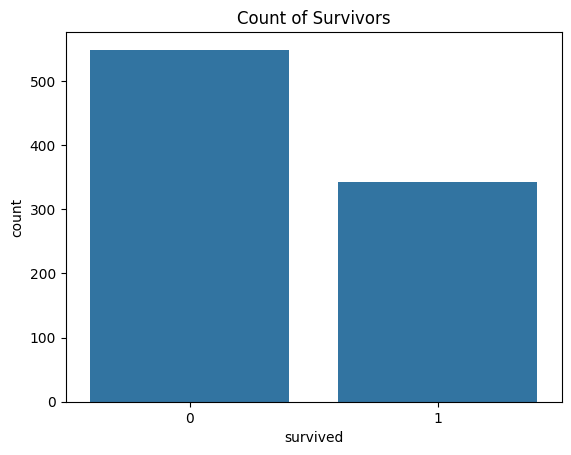

In [ ]:
# Countplot for survival
sns.countplot(x='survived', data=df)
plt.title('Count of Survivors')
plt.show()


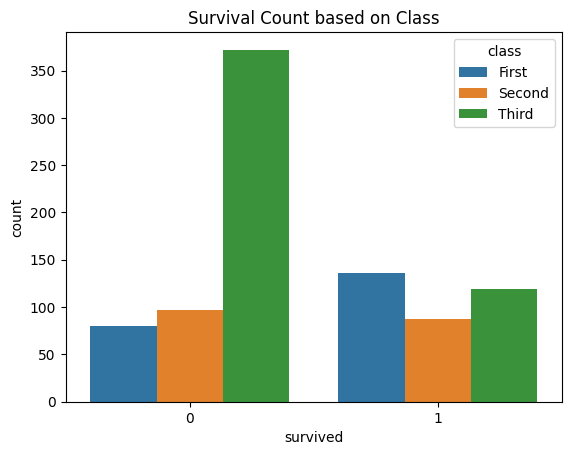

In [ ]:
# Countplot for survival based on class
sns.countplot(x='survived', hue='class', data=df)
plt.title('Survival Count based on Class')
plt.show()

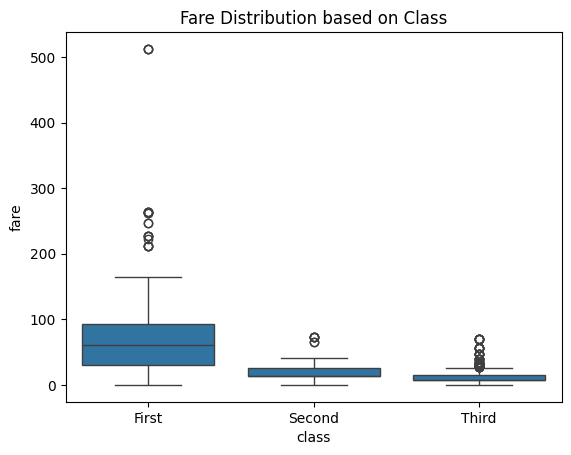

In [ ]:
# Boxplot for fare distribution based on class
sns.boxplot(x='class', y='fare', data=df)
plt.title('Fare Distribution based on Class')
plt.show()

<ipython-input-10-03bc67baf098>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


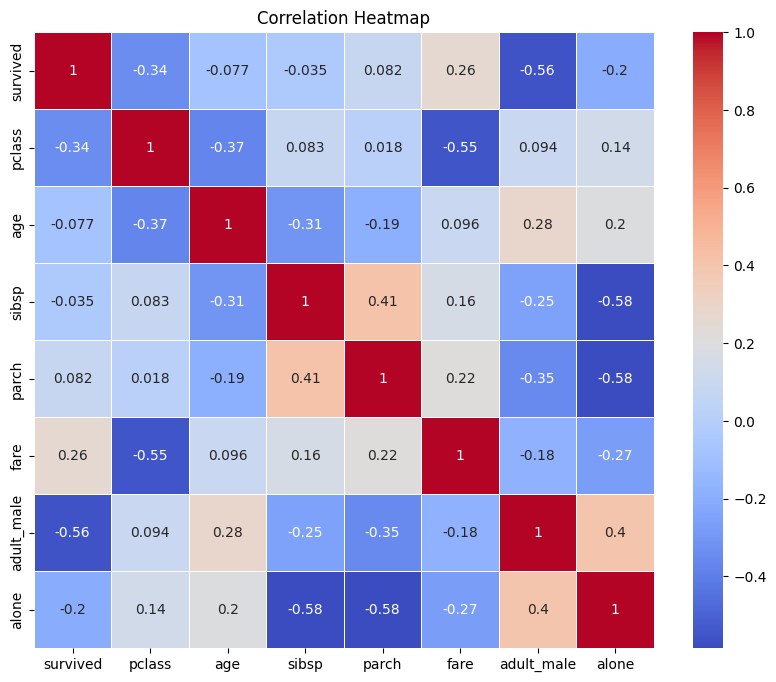

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


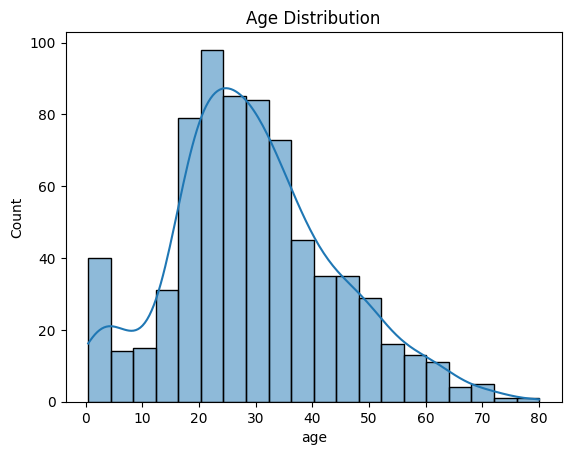

In [ ]:
# Age distribution
sns.histplot(df['age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

# Proccesing & Cleaning Data

Detect outliers in a numerical column using Z-score method.

In [ ]:
numerical_columns = ['age', 'sibsp','parch','fare']

def detect_outliers_z_score(data, column, threshold=3):
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    outliers = data[z_scores > threshold]
    return outliers

outliers_dict = {}
#loop in each numerical col to find outliers
for column in numerical_columns:
    outliers = detect_outliers_z_score(df, column)
    outliers_dict[column] = outliers

for column, outliers in outliers_dict.items():
    print(f"Outliers in '{column}':")
    print(outliers)


Outliers in 'age':
     survived  pclass   sex   age  sibsp  parch    fare embarked  class  who  \
630         1       1  male  80.0      0      0  30.000        S  First  man   
851         0       3  male  74.0      0      0   7.775        S  Third  man   

     adult_male deck  embark_town alive  alone  
630        True    A  Southampton   yes   True  
851        True  NaN  Southampton    no   True  
Outliers in 'sibsp':
     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
16          0       3    male   2.0      4      1  29.1250        Q  Third   
50          0       3    male   7.0      4      1  39.6875        S  Third   
59          0       3    male  11.0      5      2  46.9000        S  Third   
68          1       3  female  17.0      4      2   7.9250        S  Third   
71          0       3  female  16.0      5      2  46.9000        S  Third   
119         0       3  female   2.0      4      2  31.2750        S  Third   
159         0       3    m

BoxPlot for visulising the outliers in each numerical column

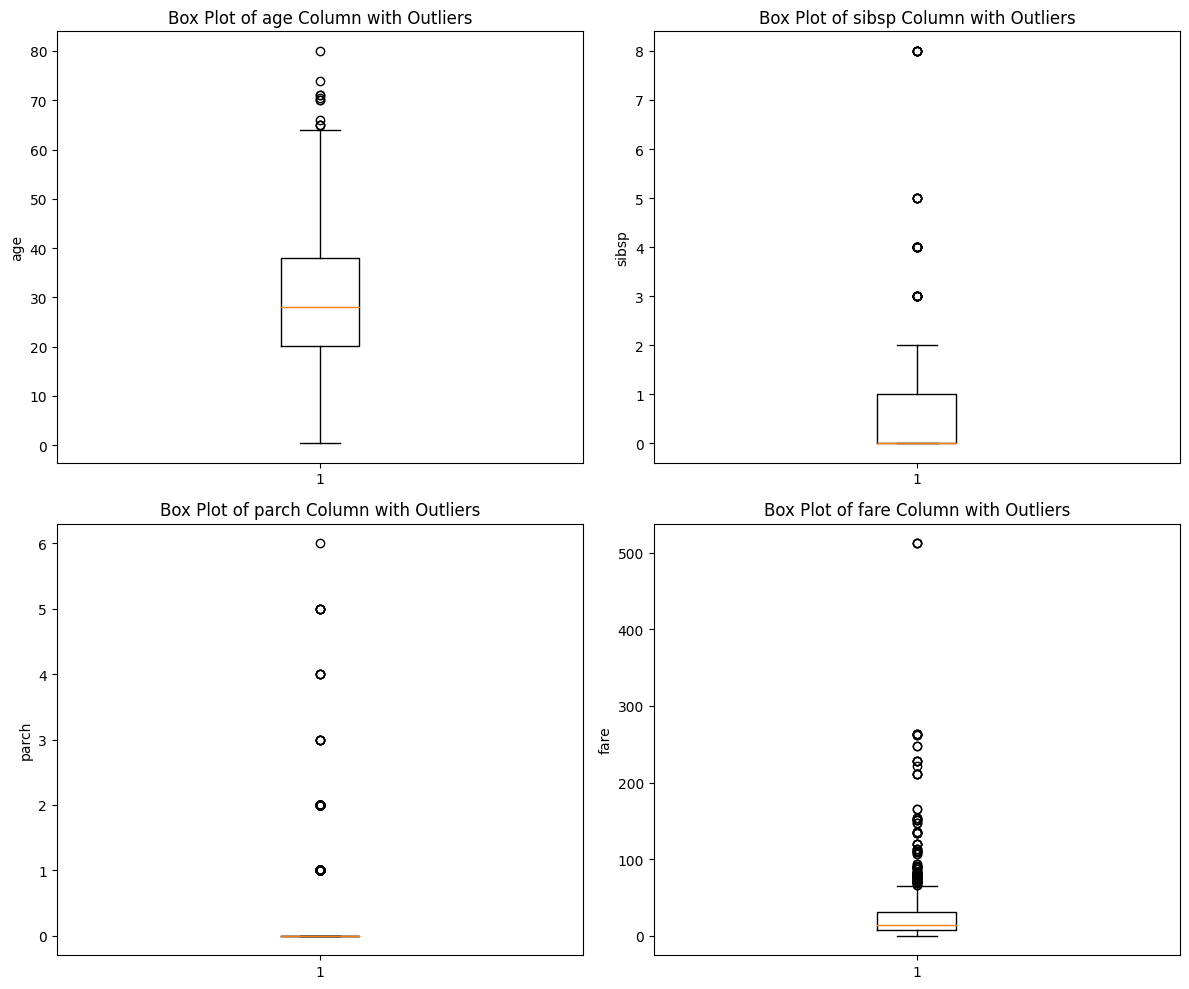

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (column, outliers) in enumerate(outliers_dict.items()):
    ax = axes[i // 2, i % 2]
    ax.boxplot(df[column].dropna())
    ax.set_title(f'Box Plot of {column} Column with Outliers')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()

Scatterplot for visulising the outliers in each numerical coloumn

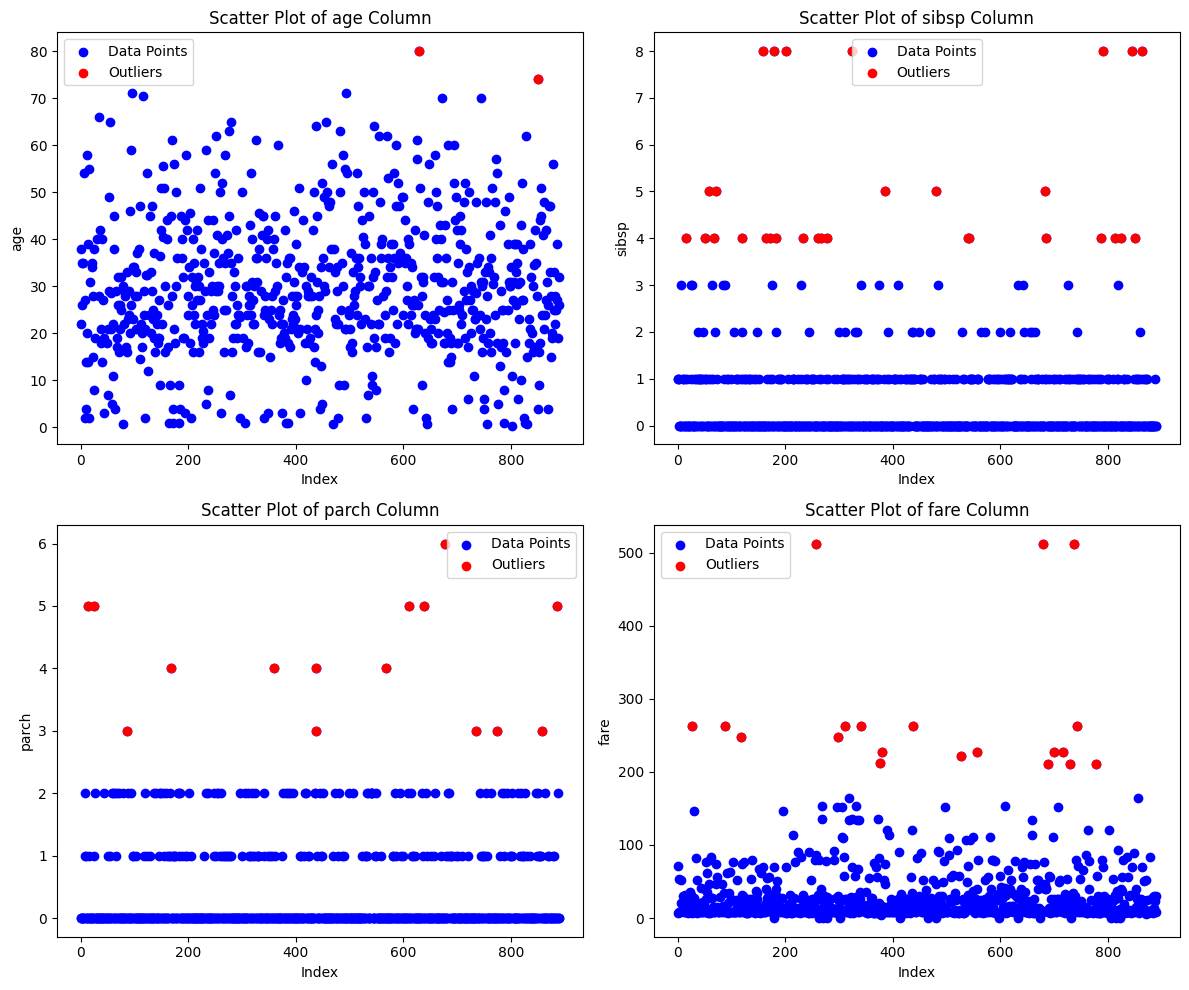

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (column, outliers) in enumerate(outliers_dict.items()):
    ax = axes[i // 2, i % 2]
    ax.scatter(df.index, df[column], color='blue', label='Data Points')
    ax.scatter(outliers.index, outliers[column], color='red', label='Outliers')
    ax.set_title(f'Scatter Plot of {column} Column')
    ax.set_xlabel('Index')
    ax.set_ylabel(column)
    ax.legend()

plt.tight_layout()
plt.show()

Based on the initial analysis of the Titanic dataset, we can make the following comments and observations regarding data quality issues:


1.   Missing Values:

      *   There are missing values in the 'age', 'embarked', 'deck', and 'embark_town' columns.

      *   Age: There are 177 missing values in the 'age' column. Embarked:There are 2 missing values in the 'embarked' column. Deck: There are 688 missing values in the 'deck' column.Embark_town: There are 2 missing values in the 'embark_town' column.
      *   We need to address these missing values as they can impact the quality of our analysis and modeling.
---
2.   Handling Missing Values:

      *   For the 'age' column, since it's a numerical feature, one approach could be to impute the missing values using the mean or median age.
      *   For the 'embarked' and 'embark_town' columns, which are categorical, we could either remove the rows with missing values or impute them with the mode (most frequent value).
      *   The 'deck' column has a significant number of missing values. Depending on its importance to the analysis, we might consider dropping this column entirely or encoding missing values as a separate category.
---
3.   Outliers:

      *  Based on the Z-score method, outliers were identified in the 'age', 'sibsp', 'parch', and 'fare' columns of the Titanic dataset.

      *   Outliers were found in:      

          1.   Age: Two outliers were detected, corresponding to passengers aged significantly higher than the rest of the dataset.
          2.   Sibsp and Parch: Several outliers were identified in these columns, indicating passengers with unusually high numbers of siblings/spouses or parents/children aboard.
          3.   Fare: Several outliers were identified in the 'fare' column, indicating passengers who paid significantly higher fares than the majority.

      *   We need to decide whether to keep, remove, or handle these outliers in a separate manner.


---
4.   Handling Outliers:
      Either we conduct separate analyses for these outliers to explore if their characteristics contribute unique insights or patterns, or remove them from the dataset if their influence on the analysis is deemed too significant..



---
To Handle missing values in Age:

In [ ]:
# Handling missing values in 'age' column
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)

To Handle Missing Values in 'embarked' & 'embarked_town' features:

In [ ]:
# Handling missing values in categorical columns
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# Encoding categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['sex', 'embarked', 'embark_town']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


To handle missing values in 'Deck' feature:

In [ ]:
# Dropping 'deck' column due to a significant number of missing values
df.drop('deck', axis=1, inplace=True)

Missing values in each feature after handling:

In [ ]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

Label Encoding for the categorical columns:

In [ ]:
# Encoding remaining categorical columns
label_encoder = LabelEncoder()

#'class' column
df['class'] = label_encoder.fit_transform(df['class'])

#'who' column
df['who'] = label_encoder.fit_transform(df['who'])

#'alive' column
df['alive'] = label_encoder.fit_transform(df['alive'])

# Converting boolean columns to numeric (0 or 1)
df['adult_male'] = df['adult_male'].astype(int)
df['alone'] = df['alone'].astype(int)


Finding the relevance of each feature to the targer 'Survived':

In [ ]:
correlation = df.corr()
crr = correlation['survived'].abs().sort_values(ascending=False)
crr

survived       1.000000
alive          1.000000
adult_male     0.557080
sex            0.543351
class          0.338481
pclass         0.338481
who            0.325753
fare           0.257307
alone          0.203367
embarked       0.167675
embark_town    0.167675
parch          0.081629
age            0.064910
sibsp          0.035322
Name: survived, dtype: float64

---
Based on the correlation coefficients calculated between the 'survived'(target/goal) column and other features in the dataset, the following observations can be made:


1.   **Strong Positive Correlations:**

    *   survived' and 'alive' have a perfect positive correlation of 1. This is expected as they essentially represent the same information, one being a binary indicator of survival ('survived') and the other being a string representation ('alive').

    *   'survived' and 'adult_male' have a strong positive correlation of 0.557080, indicating that being an adult male is negatively correlated with survival. This is consistent with historical data from the Titanic disaster where priority was given to women and children.

    *   'survived' and 'sex' have a strong positive correlation of 0.543351, indicating that being female is positively correlated with survival. Again, this aligns with the historical precedence of "women and children first" in evacuation procedures.


2.   **Moderate Positive Correlations:**

    *   'survived' and 'class'/'pclass' have moderate positive correlations of 0.338481. This suggests that there is a correlation between passenger class and survival rate, with higher classes being more likely to survive.
    *   'survived' and 'who' have a moderate positive correlation of 0.325753, indicating a correlation between the passenger designation ('who') and survival.

3.   **Weak Positive Correlations:**

    *   'survived' and 'fare' have a weak positive correlation of 0.257307, indicating a slight correlation between the fare paid and the likelihood of survival.
    *   'survived' and 'alone' have a weak positive correlation of 0.203367, suggesting a slight correlation between traveling alone and survival.


4.   **Weak Negative Correlations:**

    *   'survived' and 'embarked'/'embark_town' have weak negative correlations of 0.167675, indicating a minor correlation between the port of embarkation and survival.
    *   'survived' and 'parch' have a weak negative correlation of 0.081629, suggesting a small correlation between the number of parents/children aboard and survival.
    *   'survived' and 'age' have a weak negative correlation of 0.064910, indicating a slight correlation between age and survival, with younger passengers slightly more likely to survive.
    *   'survived' and 'sibsp' have a very weak positive correlation of 0.035322, indicating a very minor correlation between the number of siblings/spouses aboard and survival.


Overall, the correlation analysis suggests that being an adult male, belonging to a higher passenger class, paying a higher fare, and traveling alone were associated with higher chances of survival, while other factors such as age, the number of parents/children aboard, and the number of siblings/spouses aboard had weaker or negligible associations with survival.




# Machine Learning

Starting with train/test splitting method after droping the target 'survived' and droping also 'alive' column which was a string represntative for the 'survived' feature before encoding it.

In [118]:
X = df.drop(['survived', 'alive'], axis=1)
y = df['survived']

# Split the dataset into training and testing subsets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MinMax Scaller was used in which features are scaled to a specific range, often [0, 1].

In [125]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

PCA was used to reduce the dimensionality of data, with 2 compenents.

In [144]:
# Instantiate PCA with desired number of components
pca = PCA(n_components=2)
# Fit PCA on scaled data and transform it
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


***Machine Learining Models***

**Decision Tree**

This model with defualt parameters.

In [127]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_pca, y_train)
y_pred = decision_tree.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree Classifier:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy of Decision Tree Classifier: 0.7988826815642458
Confusion Matrix:
 [[85 20]
 [16 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       105
           1       0.74      0.78      0.76        74

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.79       179
weighted avg       0.80      0.80      0.80       179



Grid Search was used to find the best parameters for the model

In [129]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV instance on your data
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree Classifier:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.8061755146262188
Accuracy of Decision Tree Classifier: 0.8212290502793296
Confusion Matrix:
 [[92 13]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



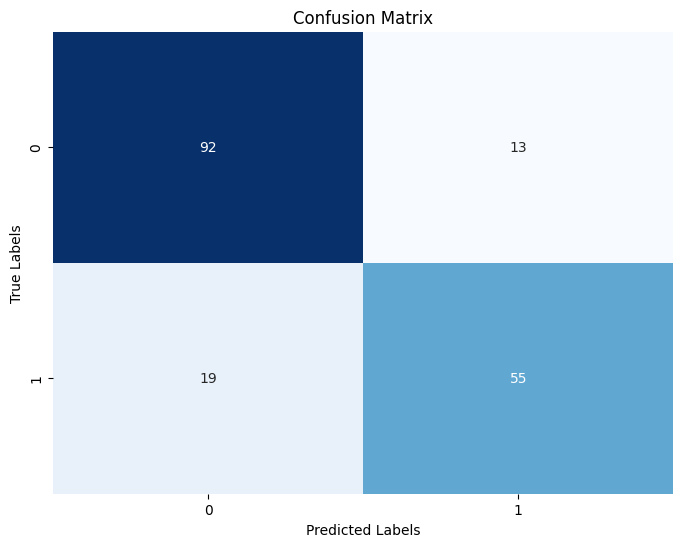

In [135]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

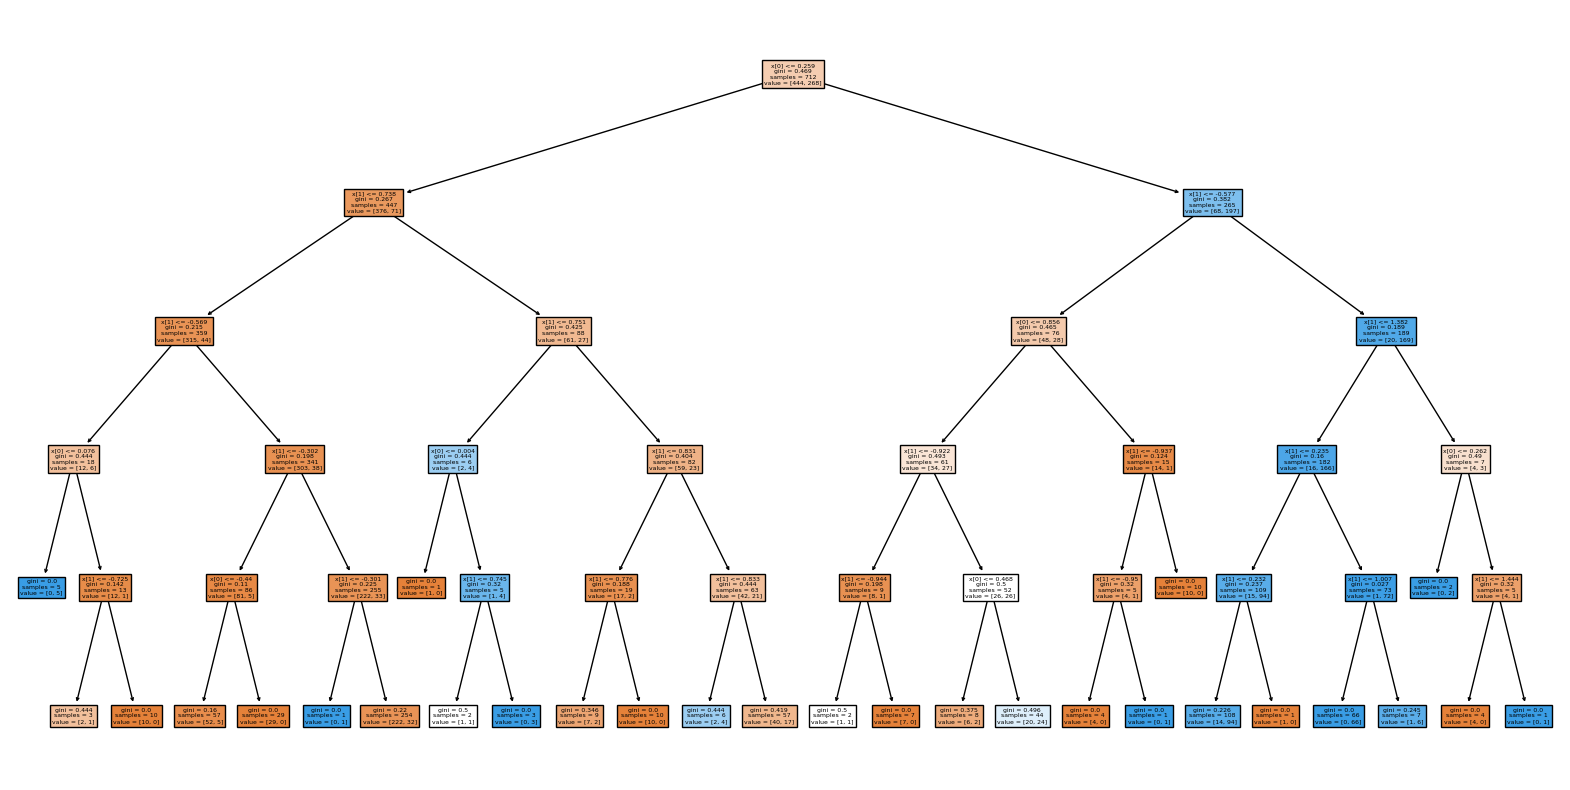

In [137]:
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True)
plt.show()

---
Decision Tree classifier was initially trained with default parameters, and then a grid search was performed to optimize the model's parameters.


1.   Default Decision Tree Model:

  *   Accuracy: 0.7988
  *   Confusion Matrix:
                [[85 20]
                [16 58]]
  *   The default model had an accuracy of around 79.88%. Precision, recall, and F1-score for class 0 (survived) are relatively higher compared to class 1 (not survived), indicating that the model performs slightly better at predicting class 0.


2.   Grid Search Optimized Model:


  *   Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
  *   Best Score: 0.8062
  *   Accuracy: 0.8212
  *   Confusion Matrix:
                      [[92 13]
                       [19 55]]


*   The grid search optimized model achieved an accuracy of around 82.12%, which is slightly better than the default model.


3.   Comparison

  *   The optimized model outperforms the default model, indicating that parameter tuning through grid search improved the model's performance.

  *   Both models seem to have better performance in predicting class 0 (survived) than class 1 (not survived), which is evident from higher precision, recall, and F1-score for class 0 in both cases.
  *   The optimized model shows improvement particularly in terms of reducing false positives (predicted survived but actually not survived), as evident from the decrease in the confusion matrix's (0,1) entry.


Overall, the grid search optimization helped in fine-tuning the parameters of the Decision Tree classifier, resulting in a more accurate model for predicting survival outcomes.




---
**Random Forest**

In [138]:
random_forest = RandomForestClassifier(random_state=42)

# Train the model
random_forest.fit(X_train_pca, y_train)


y_pred = random_forest.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy of Random Forest Classifier: 0.7932960893854749
Confusion Matrix:
 [[84 21]
 [16 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       105
           1       0.73      0.78      0.76        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.79      0.79       179



Grid Search was used to find the best parameters for the model.

In [139]:

# Create Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_pca, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict on the test set using best estimator
best_random_forest = grid_search.best_estimator_
y_pred = best_random_forest.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy of Random Forest Classifier: 0.8044692737430168
Confusion Matrix:
 [[93 12]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



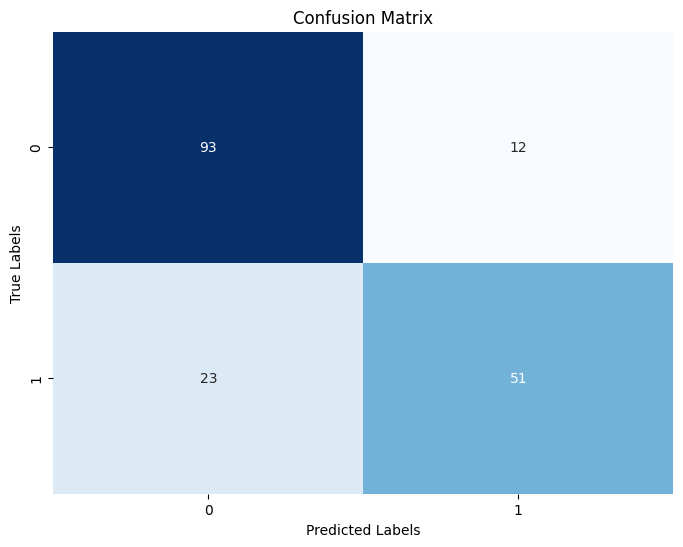

In [143]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

---

Random Forest classifier was initially trained with default parameters, and then a grid search was performed to optimize the model's parameters.


1.   Default Random Forest Model:

  *   Accuracy: 0.7933
  *   Confusion Matrix:
                [[84 21]
                [16 58]]
  *   The default model had an accuracy of around 79.33%. Precision, recall, and F1-score for class 0 (survived) are relatively higher compared to class 1 (not survived), indicating that the model performs slightly better at predicting class 0.


2.   Grid Search Optimized Model:


  *   Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
  *   Accuracy: 0.8045
  *   Confusion Matrix:
                      [[93 12]
                       [23 51]]


  *   The grid search optimized model achieved an accuracy of around 80.45%, which is slightly better than the default model.

3.   Comparison

  *   Similar to the Decision Tree, the optimized Random Forest model outperforms the default model, indicating that parameter tuning through grid search improved the model's performance.

  *   Both models seem to have better performance in predicting class 0 (survived) than class 1 (not survived), which is evident from higher precision, recall, and F1-score for class 0 in both cases.
  *   The optimized model shows improvement particularly in terms of reducing false negatives (predicted not survived but actually survived), as evident from the increase in the confusion matrix's (1,0) entry.

In summary, similar to the Decision Tree classifier, the Random Forest classifier benefited from parameter tuning through grid search, resulting in a more accurate model for predicting survival outcomes.

---

---
